# Uvod u biblioteku Pandas

**Pandas** je Python biblioteka koja je namenjena radu sa tabelarnim podacima. Na [ovom](https://pandas.pydata.org/) linku se nalazi zvanična stranica, a [ovde](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) se može pronaći koristan tutorijal.

Osnovne strukture podataka koje koristi biblioteka Pandas su:

- jednodimenziona struktura **Series**
- dvodimenziona struktura **DataFrame**

U pitanju su strukture podataka kojima se predstavljaju strukturni podaci koji imaju obeležja po jednoj, odnosno dve dimenzije.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Series objekti

**Series** je struktura podataka koja odgovara jednodimenzionom nizu sa pridruženim obeležjima (indeksima).

In [2]:
points = pd.Series([(1, 3), (2, 4), (6, 4), (5, 7)])
print(points)

0    (1, 3)
1    (2, 4)
2    (6, 4)
3    (5, 7)
dtype: object


In [3]:
print('Vrednosti: ', points.values)

Vrednosti:  [(1, 3) (2, 4) (6, 4) (5, 7)]


In [4]:
print('Indeksi: ', points.index)

Indeksi:  RangeIndex(start=0, stop=4, step=1)


Indeks objekta Series je podrazumevano sekvenca celobrojnih vrednosti. U opštem slučaju se parametrom `index` prilikom konstrukcije serije može eksplicitno zadati index.

In [5]:
points = pd.Series([(1, 3), (2, 4), (6, 4), (5, 7)], index=['A', 'B', 'C', 'D'])
print(points)

A    (1, 3)
B    (2, 4)
C    (6, 4)
D    (5, 7)
dtype: object


In [6]:
print('Indeksi: ', points.index)

Indeksi:  Index(['A', 'B', 'C', 'D'], dtype='object')


Elementi serije i njihovi indeksi se mogu zadati i u formi rečnika. 

In [7]:
points = pd.Series({'A' : (1, 3), 'B' : (2, 4), 'C' : (6, 4), 'D' : (5, 7)})
print(points)

A    (1, 3)
B    (2, 4)
C    (6, 4)
D    (5, 7)
dtype: object


Korišćenjem funkcije `reindex` se može izvršiti preraspodela elemenata serije.

In [8]:
points.reindex(index=['B', 'D', 'A', 'C'])

B    (2, 4)
D    (5, 7)
A    (1, 3)
C    (6, 4)
dtype: object

## Indeksiranje i izdvajanje elemenata (eng. slicing)

Postoji više načina za pristup elementima objekta Series:

1) Objekat Series ima kao atribute svaku od vrednosti indeksa elemenata, tako da se pojedinačnim elementima može pristupiti na taj način.

2) Nad objektima Series se može primeniti operator indeksiranja \[\] koji očekuje vrednosti njihovog indeksa ili pozicije.

In [9]:
print(points.C)

(6, 4)


In [10]:
print(points['C'])

(6, 4)


In [11]:
print(points[['B', 'C']])

B    (2, 4)
C    (6, 4)
dtype: object


In [12]:
print(points[::2])

A    (1, 3)
C    (6, 4)
dtype: object


# DataFrame objekti

**DataFrame** je struktura podataka koja odgovara tabeli sa pridruženim obeležjima redovima i kolonama. **Svaka kolona i svaka vrsta objekta DataFrame je jedan Series objekat.**

Ukoliko se ne učitavaju iz datoteke, podaci se u strukturu DataFrame smeštaju iz mape ili matrice.

Sledeći primer demonstira kreiranje objekta DataFrame navođenjem imena kolona i vrednosti koje one sadrže.

In [13]:
data = pd.DataFrame({
    'name' : ['A', 'B', 'C', 'D'],
    'x_value' : [1, 2, 6, 5],
    'y_value' : [3, 4, 4, 7]
})

In [14]:
data

,name,x_value,y_value
0,A,1,3
1,B,2,4
2,C,6,4
3,D,5,7


Strukturu DataFrame možemo kreirati i navođenjem vrsta. Tada posebnim argumentom `columns` navodimo značenja vrednosti koje se navode.

In [15]:
data = pd.DataFrame([['A', 1, 3], ['B', 2, 4], ['C', 6, 4], ['D', 5, 7]], columns=['name', 'x_value', 'y_value'])

In [16]:
data

,name,x_value,y_value
0,A,1,3
1,B,2,4
2,C,6,4
3,D,5,7


Vrednosti i indeksi objekta DataFrame se mogu, takođe, očitati korišćenjem svojstava `values` i `index`.

In [17]:
print('Vrednosti:\n', data.values)

Vrednosti:
 [['A' 1 3]
 ['B' 2 4]
 ['C' 6 4]
 ['D' 5 7]]


In [18]:
print('Indeksi redova: ', data.index)           

Indeksi redova:  RangeIndex(start=0, stop=4, step=1)


Osim svojstava <code>values</code> i <code>index</code> koje imaju Series objekti, DataFrame objekti imaju i svojstvo <code>columns</code>.

In [19]:
print('Indeksi kolona: ', data.columns)

Indeksi kolona:  Index(['name', 'x_value', 'y_value'], dtype='object')


Za indeks objekta DataFrame može se eksplicitno postaviti i neka postojeća kolona tj. ne moramo se osloniti na podrazumevano ponašanje biblioteke i dodavanje numeričkog indeks. U te svrhe može se iskoristiti funkcija `set_index`.

Postavljanje neke od kolona za indeks redova

In [20]:
data.set_index('name', inplace=True)      #II nacin: data = data.set_index('name')
data

,x_value,y_value
name,,
A,1,3
B,2,4
C,6,4
D,5,7


Prilikom kreiranja objekta DataFrame indeksi vrsta i kolona se mogu eksplicitno zadati na sledeći način:

In [21]:
data = pd.DataFrame([[1, 3], [2, 4], [6, 4], [5, 7]], columns=['x_value', 'y_value'], index=['A', 'B', 'C', 'D'])
data

,x_value,y_value
A,1,3
B,2,4
C,6,4
D,5,7


## Indeksiranje i izdvajanje elemenata (eng. slicing)

Postoji više načina za pristup elementima DataFrame objekta:

1) DataFrame objekat ima kao atribute svaku od vrednosti indeksa kolona (naziva kolona), tako da se kolonama može direktno pristupiti na taj način.

2) Nad DataFrame objektima se može primeniti operator indeksiranja \[\] (koji razlikujemo od operatora isecanja) za pristup kolonama zadavanjem vrednosti njihovog indeksa kolona (naziva kolona).

3) DataFrame objekat ima atribute <code>loc</code> i <code>iloc</code> - tzv. objekate indeksere (~iterator) koji se koriste za pristup pojedinačnim elementima i izdvajanje delova DataFrame objekta.

- <code>loc</code> je **label-based** indekser, što znači da se pomoću njega vrši indeksiranje zadavanjem labela (obeležja, indeksa) redova i kolona 
- <code>iloc</code> je **integer position-based**, sto znači da se pomoću njega vrši indeksiranje zadavanjem pozicija redova i kolona (pozicije se broje počev od 0) 

4) Pristup pojedinačnim elementima se takođe može izvršiti svođenjem na rad sa Series objektima - tako što se na način (1) ili (2) pristupi odgovarajućoj koloni, a zatim traženom elementu te kolone.

In [22]:
print(type(data.loc))

<class 'pandas.core.indexing._LocIndexer'>


In [23]:
print(type(data.iloc))

<class 'pandas.core.indexing._iLocIndexer'>


### Različiti načini za pristup pojedinačnim elementima

In [24]:
print(data.loc['A', 'x_value'])

1


In [25]:
print(data.iloc[0, 0])

1


In [26]:
print(data['x_value']['A'])

1


### Različiti načini za izdvajanje pojedinačnih kolona

In [27]:
print(data.x_value)

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


In [28]:
print(data['x_value'])

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


In [29]:
print(data.iloc[:, 0])

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


In [30]:
print(data.loc[:, 'x_value'])

A    1
B    2
C    6
D    5
Name: x_value, dtype: int64


### Različiti načini za izdvajanje pojedinačnih redova

In [31]:
print(data.iloc[0, :]) 

x_value    1
y_value    3
Name: A, dtype: int64


In [32]:
print(data.iloc[0])

x_value    1
y_value    3
Name: A, dtype: int64


In [33]:
print(data.loc['A', :])

x_value    1
y_value    3
Name: A, dtype: int64


In [34]:
print(data.loc['A'])

x_value    1
y_value    3
Name: A, dtype: int64


### Izdvajanje elemenata (razno)

Pregled prvih nekoliko redova je moguć uz korišćenje funkcije `head`, a pregled poslednjih nekoliko redova uz korišćenje funkcije `tail`. Nekoliko nasumičnih redova se može dobiti korišćenjem funkcije `sample`.

In [35]:
data.head(2)

,x_value,y_value
A,1,3
B,2,4


Poslednjih nekoliko redova

In [36]:
data.tail(2)

,x_value,y_value
C,6,4
D,5,7


Izdvajanje nekih kolona zadatih listom:

In [37]:
data[['x_value', 'y_value']]

,x_value,y_value
A,1,3
B,2,4
C,6,4
D,5,7


Izdvajanje nekih redova zadatih pozicijama:

In [38]:
data.iloc[::2]

,x_value,y_value
A,1,3
C,6,4


Izdvajanje elemenata koji ispunjavaju neki uslov:

In [39]:
data[data.x_value % 2 == 0]

,x_value,y_value
B,2,4
C,6,4


Važno je naglasiti da se primenom aritmetičkih, logičkih i relacionih operatora nad Series i DataFrame objektom dobija se novi objekat sa izvršenom odgovarajućom operacijom po elementima, uz očuvanje indeksa u rezultujućem objektu.

In [40]:
data.x_value % 2 == 0

A    False
B     True
C     True
D    False
Name: x_value, dtype: bool

## Transformacije nad objektom DataFrame

Većina funkcija za transformacije nad objektom DataFrame ima argument <code>axis</code> kojim se zadaje osa po kojoj će transformacija biti izvršena. DataFrame objekti imaju dve ose - **osu 0** koja predstavlja redove i **osu 1** koja predstavlja kolone. Za većinu funkcija podrazumevana vrednost argumenta <code>axis</code> je <code>0</code>.

<img src="assets/dataframe_axis.png" width="250" align=left>

Preraspodela duž vrsta zadavanjem redosleda novih indeksa se može realizovati na sledeći način:

In [41]:
data.reindex(['B', 'D', 'A', 'C'], axis=0)       

,x_value,y_value
B,2,4
D,5,7
A,1,3
C,6,4


Slično, preraspodela duž kolona se može realizovati zadavanjem redosleda njihovih indeksa:

In [42]:
data.reindex(['y_value', 'x_value'], axis=1)

,y_value,x_value
A,3,1
B,4,2
C,4,6
D,7,5


Vrednosti u objektu DataFrame je moguće sortirati po indeksu redova ili kolona.

Za sortiranje po indeksu vrsta koristi se funkcija `sort_index`.

In [43]:
data.sort_index(ascending=False)          

,x_value,y_value
D,5,7
C,6,4
B,2,4
A,1,3


Sortiranje po vrednostima elemenata u specifičnoj koloni se postiže funkcijom `sort_values`. Ekvivalentno bi se moglo postići i za redove.

In [44]:
data.sort_values(by='x_value')            

,x_value,y_value
A,1,3
B,2,4
D,5,7
C,6,4


DataFrame strukturu je moguće i transponovati.

In [45]:
data.T

,A,B,C,D
x_value,1,2,6,5
y_value,3,4,4,7


Elemente sadržane u objektu DataFrame, ukoliko to ima smisla, moguće je izvdojiti u višedimenzioni niz biblioteke `numpy`. U te svrhe se koristi funkcija `to_numpy`.

In [46]:
data.to_numpy()

array([[1, 3],
       [2, 4],
       [6, 4],
       [5, 7]])

Strukture DataFrame je moguće proširivati dodavanjem novih redova ili kolona.

Dodavanje novih kolona:

In [47]:
data['color'] = ['blue', 'red', 'blue', 'blue']

In [48]:
data

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue


Dodavanje novih redova:

## Spajanje DataFrame objekata

Postoji nekoliko funkcija/metoda koje se mogu koristiti za spajanje DataFrame objekata na različite načine:

- <code>concat()</code> - vrši konkatenaciju (spajanje) Pandas objekata duž određene ose (po redovima ili kolonama) na osnovu indeksa (redova ili kolona) ili obično nadovezivanje ignorišući indekse 

- <code>join()</code> - vrši isključivo spajanje redova dva (ili više) DataFrame-a, i to na osnovu indeksa redova ili vrednosti u nekoj zadatoj koloni

- <code>merge()</code> - vrši razne vrste 'database-style' spajanja DataFrame-ova

### Funkcija concat 

In [49]:
df1 = data[['x_value', 'y_value']]
df1 

,x_value,y_value
A,1,3
B,2,4
C,6,4
D,5,7


In [50]:
df2 = data['color']
df2

A    blue
B     red
C    blue
D    blue
Name: color, dtype: object

In [51]:
pd.concat([df1, df2], axis=1)

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue


In [52]:
df1 = data.iloc[:4]
df1

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue


In [53]:
df2 = data.iloc[-1:]
df2

,x_value,y_value,color
D,5,7,blue


In [54]:
pd.concat([df1, df2])

,x_value,y_value,color
A,1,3,blue
B,2,4,red
C,6,4,blue
D,5,7,blue
D,5,7,blue


In [55]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [56]:
df2 = data[['color']][2:]            
df2                                       

,color
C,blue
D,blue


In [57]:
pd.concat([df1, df2], axis=1)

,x_value,y_value,color
A,1.0,3.0,NaN
B,2.0,4.0,NaN
C,6.0,4.0,blue
D,NaN,NaN,blue


**NAPOMENA**: funkcija <code>concat()</code> podrazumevano vrši takozvano **spoljašnje spajanje (eng. OUTER JOIN)** - rezultat je unija DataFrame-ova (DataFrame koji sadrži uniju indeksa DataFrame-ova koji se spajaju, kako po osi po kojoj se vrši spajanje, tako i po drugoj osi). Polja koja nemaju pridruženu vrednost ni u jednom od DataFrame-ova koji se spajaju, popunjavaju se <code>NaN</code> vrednostima.       

### Metoda join

Postoji nekoliko tipova spajanja tabela tj. DataFrame objekata:

- **unutrašnje spajanje (eng. INNER JOIN)** - rezultat je presek dva DataFrame-a tj. DataFrame objekat koji sadrži samo redove za koje postoji poklapanje po vrednostima indeksa ili kolone po kojoj se vrši spajanje

- **levo spoljašnje spajanje (eng. LEFT OUTER JOIN)** - rezultat je DataFrame objekat koji sadrži sve redove iz prvog (levog) DataFrame-a sa pridruženim vrednostima iz drugog (desnog) DataFrame-a ili NaN vrednostima ukoliko takve ne postoje

- **desno spoljašnje spajanje (eng. RIGHT OUTER JOIN)** - rezultat je DataFrame objekat koji sadrži sve redove iz drugog (desnog) DataFrame-a sa pridruženim vrednostima iz prvog (levog) DataFrame-a ili NaN vrednostima ukoliko takve ne postoje

- **potpuno spoljašnje spajanje (eng. FULL OUTER JOIN)** - rezultat je unija dva DataFrame-a tj. DataFrame objekat koji sadrži redove iz oba DataFrame-a sa pridruženim NaN vrednostima ukoliko njima odgovarajuća vrednost indeksa ili kolone po kojoj se vrši spajanje nije prisutna i u drugom DataFrame-u

<img src="assets/join_variants.png" width="350" align=center>

**NAPOMENA**: U slucaju da se spajanje redova vrši na osnovu indeksa, za primenu <code>join()</code> metoda potrebno je da DataFrame-ovi nemaju kolone koje se preklapaju! U suprotnom, DataFrame-ovi koji se spajaju moraju imati zajedničku samo tu jednu kolonu po kojoj se vrši spajanje.

In [58]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [59]:
df2 = data[['color']][2:]            
df2                                       

,color
C,blue
D,blue


In [60]:
df1.join(df2, how='inner')

,x_value,y_value,color
C,6,4,blue


In [61]:
df1.join(df2, how='left')

,x_value,y_value,color
A,1,3,NaN
B,2,4,NaN
C,6,4,blue


In [62]:
df1.join(df2, how='right')

,x_value,y_value,color
C,6.0,4.0,blue
D,NaN,NaN,blue


In [63]:
df1.join(df2, how='outer')

,x_value,y_value,color
A,1.0,3.0,NaN
B,2.0,4.0,NaN
C,6.0,4.0,blue
D,NaN,NaN,blue


**NAPOMENA**: <code>concat(, axis=1)</code> = <code>join(, how='outer')</code>!

### Funkcija merge

Za razliku od <code>join()</code> metoda, <code>merge()</code> funkcija može da se primeni nad DataFrame-ovima koji imaju kolone koje se preklapaju. Pored **'inner'**, **'left outer'**, **'right outer'** i **'full outer'** tipa spajanja, pomoću <code>merge()</code> funkcije može da vrši takozvani **unakrsni tip spajanja (eng. CROSS JOIN)** - rezultat je Dekartov proizvod DataFrame-ova (spaja se svaki red jednog DataFrame-a sa svakim redom drugog). 

In [64]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [65]:
df2 = data[['y_value', 'color']][2:]            
df2        

,y_value,color
C,4,blue
D,7,blue


In [66]:
pd.merge(df1, df2, how='outer')         

,x_value,y_value,color
0,1.0,3,NaN
1,2.0,4,blue
2,6.0,4,blue
3,NaN,7,blue


In [67]:
pd.merge(df1, df2, how='cross')

,x_value,y_value_x,y_value_y,color
0,1,3,4,blue
1,1,3,7,blue
2,2,4,4,blue
3,2,4,7,blue
4,6,4,4,blue
5,6,4,7,blue


In [68]:
df1 = data.iloc[:3, :2]
df1

,x_value,y_value
A,1,3
B,2,4
C,6,4


In [69]:
df2 = data[['color']][2:] 
df2

,color
C,blue
D,blue


In [70]:
df = pd.merge(df1, df2, how='outer', left_index=True, right_index=True)
df

,x_value,y_value,color
A,1.0,3.0,NaN
B,2.0,4.0,NaN
C,6.0,4.0,blue
D,NaN,NaN,blue


**NAPOMENA**: <code>join()</code> = <code>merge(, left_index=True, right_index=True)</code>! 

## Rad sa nedostajućim vrednostima

In [71]:
data = data.reindex(['x_value', 'y_value', 'color', 'd(_, (0, 0))'], axis=1)
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1,3,blue,NaN
B,2,4,red,NaN
C,6,4,blue,NaN
D,5,7,blue,NaN


In [72]:
data_to_append = pd.DataFrame([[np.nan, np.nan, np.nan]],
                              columns=['x_value', 'y_value', 'color'],
                              index=['F'])
data = pd.concat([data, data_to_append], axis=0)
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,NaN
B,2.0,4.0,red,NaN
C,6.0,4.0,blue,NaN
D,5.0,7.0,blue,NaN
F,NaN,NaN,NaN,NaN


Za proveru da li je vrednost nedostajuća ili ne može se koristiti funkcija `isna`.

In [73]:
pd.isna(data)

,x_value,y_value,color,"d(_, (0, 0))"
A,False,False,False,True
B,False,False,False,True
C,False,False,False,True
D,False,False,False,True
F,True,True,True,True


Važno je napomenuti da se za pronalaženje <code>NaN</code> vrednosti ne mogu koristiti operatori poređenja zato što je prema standardu <code>NaN</code> vrednost jedina vrednost za koju poređenje nejednakosti sa samom sobom vraća <code>True</code>. Za poređenje sa <code>NaN</code> vrednostima umesto operatora poređenja koriste se funkcije <code>pd.isna()</code>, <code>pd.isnull()</code>, <code>pd.notna()</code>, <code>pd.notnull</code> i <code>np.isnan()</code>.

In [74]:
np.nan != np.nan

True

In [75]:
data != np.nan

,x_value,y_value,color,"d(_, (0, 0))"
A,True,True,True,True
B,True,True,True,True
C,True,True,True,True
D,True,True,True,True
F,True,True,True,True


Zamena nedostajućih vrednosti konkretnim vrednostima se vrši funkcijom `fillna`. U sledećem primeru u svakoj koloni je korišćena zasebna vrednost za zamenu.

In [76]:
data.fillna({'x_value' : 0, 'y_value' : 0, 'color' : 'black', 'd(_, (0, 0))' : 0})

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,0.0
B,2.0,4.0,red,0.0
C,6.0,4.0,blue,0.0
D,5.0,7.0,blue,0.0
F,0.0,0.0,black,0.0


Za brisanje vrsta tj. kolona koje sadrže nedostajuće vrednosti koristi se funkcija `dropna`.

In [77]:
data.dropna(how='all')

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,NaN
B,2.0,4.0,red,NaN
C,6.0,4.0,blue,NaN
D,5.0,7.0,blue,NaN


In [78]:
data.dropna(how='all', axis=1)

,x_value,y_value,color
A,1.0,3.0,blue
B,2.0,4.0,red
C,6.0,4.0,blue
D,5.0,7.0,blue
F,NaN,NaN,NaN


In [79]:
data.dropna(how='any')

,x_value,y_value,color,"d(_, (0, 0))"


## Primena funkcija nad elementima DataFrame objekta

###  Skalarne funkcije 

Primenom skalarnih funkcija nad Pandas objektom dobija se novi Pandas objekat sa izvršenom odgovarajućom funkcijom po elementima, uz očuvanje indeksa u rezultujućem Pandas objektu.

In [80]:
pd.isna(data)

,x_value,y_value,color,"d(_, (0, 0))"
A,False,False,False,True
B,False,False,False,True
C,False,False,False,True
D,False,False,False,True
F,True,True,True,True


In [81]:
np.power(data[['x_value', 'y_value']], 2)

,x_value,y_value
A,1.0,9.0
B,4.0,16.0
C,36.0,16.0
D,25.0,49.0
F,NaN,NaN


In [82]:
def f(x):
    return x + 5

In [83]:
f(data[['x_value', 'y_value']])

,x_value,y_value
A,6.0,8.0
B,7.0,9.0
C,11.0,9.0
D,10.0,12.0
F,NaN,NaN


In [84]:
data[['x_value', 'y_value']].map(f)

,x_value,y_value
A,6.0,8.0
B,7.0,9.0
C,11.0,9.0
D,10.0,12.0
F,NaN,NaN


In [85]:
data[['x_value', 'y_value']].map(lambda x : x + 5)

,x_value,y_value
A,6.0,8.0
B,7.0,9.0
C,11.0,9.0
D,10.0,12.0
F,NaN,NaN


### Redukcione funkcije

Primenom redukcionih funkcija nad Pandas objektom dobija se objekat manje dimenzije sa vrednostima odgovarajuće redukcione funkcije izvršene po jednoj dimenziji (vrstama ili kolonama).

In [86]:
np.max(data.x_value)

6.0

In [87]:
np.max(data[['x_value', 'y_value', 'd(_, (0, 0))']], axis=1)

A    3.0
B    4.0
C    6.0
D    7.0
F    NaN
dtype: float64

In [88]:
np.max(data[['x_value', 'y_value', 'd(_, (0, 0))']])

7.0

In [89]:
def f(row):
    return np.sqrt(row.x_value**2 + row.y_value**2)

In [90]:
f(data)

A    3.162278
B    4.472136
C    7.211103
D    8.602325
F         NaN
dtype: float64

In [91]:
data.apply(f, axis=1)

A    3.162278
B    4.472136
C    7.211103
D    8.602325
F         NaN
dtype: float64

In [92]:
data['d(_, (0, 0))'] = data.apply(
    lambda row: np.sqrt(row.x_value**2 + row.y_value**2), axis=1)
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,3.162278
B,2.0,4.0,red,4.472136
C,6.0,4.0,blue,7.211103
D,5.0,7.0,blue,8.602325
F,NaN,NaN,NaN,NaN


#### Agregatne funkcije

Agregatne funkcije su vrsta redukcionih funkcija koje se koriste za agregaciju (ukrupnjavanje, sumarizaciju) informacija iz podataka. Agregatne fukcije se primenjuju nad grupama podataka (celim kolonama ili podgrupama kolona) i vraćaju jednu vrednost za svaku od grupa podataka. Za neke od najčešće korišćenih agregacionih funkcija (npr. minimum, maksimum, prosek, medijana,...) definisani su odgovarajući metodi u Pandas biblioteci.

In [93]:
data[['x_value', 'y_value', 'd(_, (0, 0))']].max()

x_value         6.000000
y_value         7.000000
d(_, (0, 0))    8.602325
dtype: float64

In [94]:
data['x_value'].mean()

3.5

In [95]:
data['d(_, (0, 0))'].sum()

23.447841433138564

In [96]:
data[['x_value', 'y_value', 'd(_, (0, 0))']].mean(axis=1)

A    2.387426
B    3.490712
C    5.737034
D    6.867442
F         NaN
dtype: float64

## Grupisanje 

Prilikom analiziranja podataka često se ispostavi da postoje određene grupe pa je potrebno izračunati sumarne statistike za svaku od tih grupa pojedinačno.

U našem primeru DataFrame sadrži kolonu <code>'color'</code> koja ima dve moguće vrednosti - <code>'blue'</code> i <code>'red'</code>. Pretpostavimo da želimo da izračunamo prosečne vrednosti po ostalim kolonama za svaku od grupa sa istom vrednošću kolone <code>'color'</code>. To možemo uraditi pomoću <code>for</code> petlje na sledeći način:

In [97]:
for color in ['blue', 'red']:
    print(color)
    for column in data.columns:
        if column != 'color':
            print('\t', column, data[data['color'] == color][column].mean())

blue
	 x_value 4.0
	 y_value 4.666666666666667
	 d(_, (0, 0)) 6.325235159379662
red
	 x_value 2.0
	 y_value 4.0
	 d(_, (0, 0)) 4.47213595499958


Poželjno bi bilo da ne moramo eksplicitno da iteriramo kroz grupe, a samim tim ni da razmišljamo o tome koje su sve to moguće vrednosti tih podataka.

Metod <code>groupby()</code> omogućava primenu iste funkcije na podskupovima podataka koji su dobijeni na osnovu nekog parametra za grupisanje podataka. Ova operacija  se još naziva **split-apply-combine** operacija zato što se sastoji iz sledećih koraka:

- **split** - razdvajanje podataka u grupe na osnovu nekog kriterijuma
- **apply** - primena neke funkcije nad grupama (najšešće neke agregatne funkcije)
- **combine** - objedinjavanje dobijenih rezultata u novi DataFrame objekat

In [98]:
data.groupby('color')

Povratna vrednost <code>groupby</code> metoda je <code>DataFrameGroupBy</code> objekat koji sadrži informacije o grupama.

In [99]:
# I nacin
data.groupby('color').mean()

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,4.0,4.666667,6.325235
red,2.0,4.000000,4.472136


In [100]:
# II nacin
data.groupby('color').aggregate("mean")

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,4.0,4.666667,6.325235
red,2.0,4.000000,4.472136


Metod <code>aggregate()</code> omogućava da se kao funkcija za agregiranje podataka na grupama, osim ugrađenih, mogu proslediti i korisnički definisane funkcije. Metodi <code>aggregate()</code> se može proslediti i više agregatnih funkcija odjednom u okviru liste.

In [101]:
data.groupby('color').aggregate(lambda x : x.sum() / len(x))

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,4.0,4.666667,6.325235
red,2.0,4.000000,4.472136


In [102]:
data.groupby('color').aggregate(["mean", "median"])

x_value          y_value        d(_, (0, 0))          
         mean median      mean median         mean    median
color                                                       
blue      4.0    5.0  4.666667    4.0     6.325235  7.211103
red       2.0    2.0  4.000000    4.0     4.472136  4.472136

In [103]:
tmp = data.groupby('color').aggregate(["mean", "median"])

In [104]:
tmp.columns

MultiIndex([(     'x_value',   'mean'),
            (     'x_value', 'median'),
            (     'y_value',   'mean'),
            (     'y_value', 'median'),
            ('d(_, (0, 0))',   'mean'),
            ('d(_, (0, 0))', 'median')],
           )

## Vizuelizacija podataka iz DataFrame objekta

Pre nego li upoznamo podršku za vizuelizaciju, obrisaćemo poslednji red strukture `data` koji sadrži nedostajuće vrednosti.

In [105]:
data.dropna(axis=0, how='any', inplace=True)

In [106]:
data

,x_value,y_value,color,"d(_, (0, 0))"
A,1.0,3.0,blue,3.162278
B,2.0,4.0,red,4.472136
C,6.0,4.0,blue,7.211103
D,5.0,7.0,blue,8.602325


Ako se koristi tačkasti grafikon, parametri `x` i `y` predstavljaju koordinate tačaka koje se iscrtavaju, parametar `c` boju ili niz boja, a parametar `s` veličinu tačkica.

<Axes: xlabel='x_value', ylabel='y_value'>

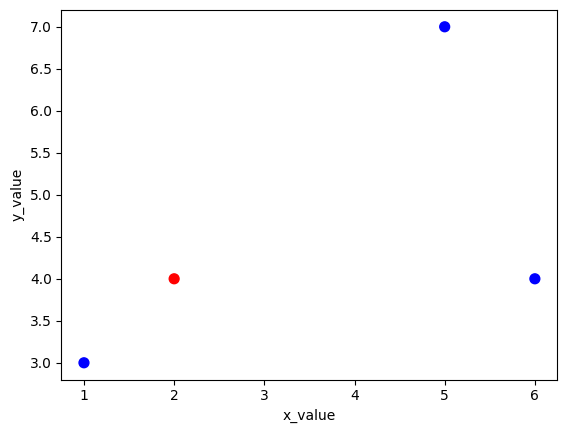

In [107]:
data.plot.scatter(x='x_value', y='y_value', c='color', s=50)

Tip grafikona za iscrtavanje može se zadati i eksplicitno parametrom `kind`.

<Axes: xlabel='x_value', ylabel='y_value'>

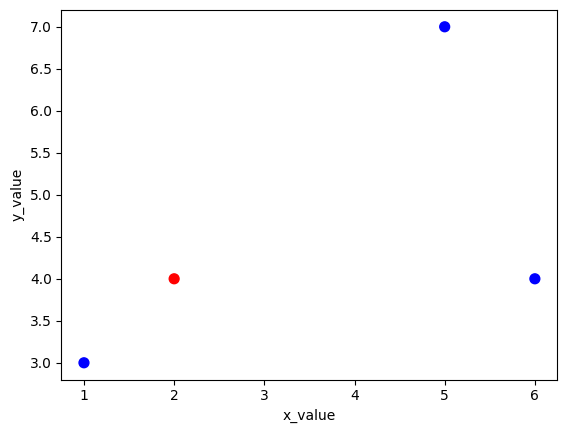

In [108]:
#II nacin
data.plot(kind='scatter', x='x_value', y='y_value', c='color', s=50)

Prikažimo sada odnos tačaka sa različitim bojama.

In [109]:
# I nacin
data.groupby('color').count()

,x_value,y_value,"d(_, (0, 0))"
color,,,
blue,3,3,3
red,1,1,1


In [110]:
# II nacin
data['color'].value_counts()

color
blue    3
red     1
Name: count, dtype: int64

Metod <code>value_counts()</code> broji koliko puta se svaka od različitih vrednosti pojavljuje u DataFrame ili Series objektu, stoga je veoma zgodan za izračunavanje raspodele kategoričkih atributa.

<Axes: ylabel='color'>

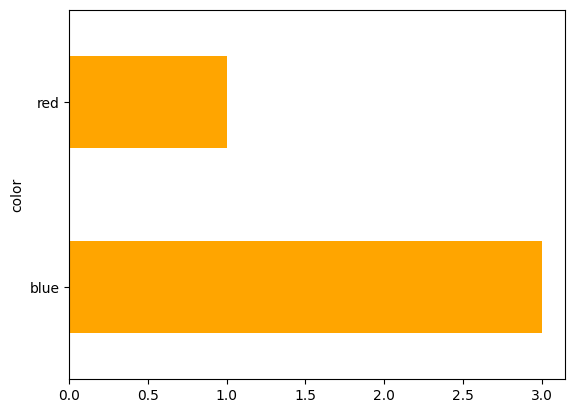

In [111]:
data['color'].value_counts().plot.barh(color='orange')

Odnos broja tačaka je moguće prikazati i grafikonom u obliku pitice.

<Axes: ylabel='count'>

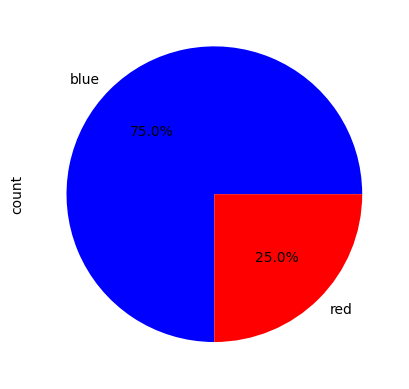

In [112]:
data['color'].value_counts().plot.pie(y='x_value', colors=['blue', 'red'], autopct='%1.1f%%')

<Axes: ylabel='count'>

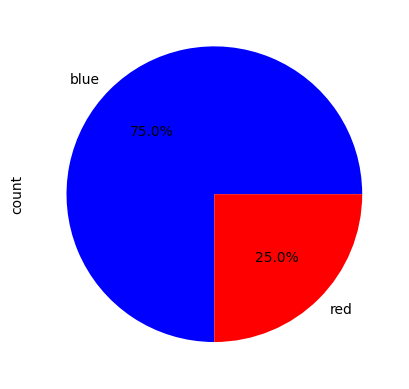

In [113]:
#II nacin
data['color'].value_counts().plot(kind='pie', y='x_value', colors=['blue', 'red'], autopct='%1.1f%%')

Naravno, moguće je kombinovati iscrtavanja koja nudi biblioteka `matplotlib` i sadržaje Pandas struktura. Sledeći primer to ilustruje.

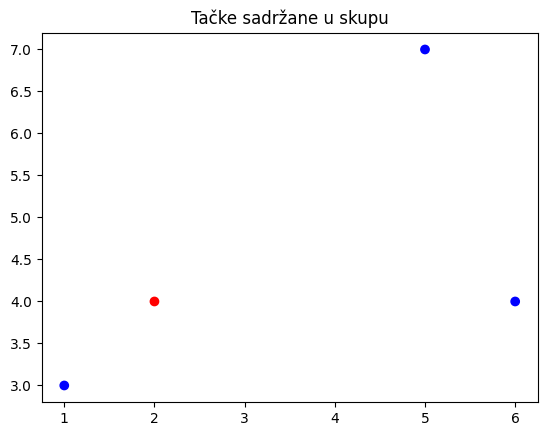

In [114]:
plt.scatter(data['x_value'], data['y_value'], color=data['color'])
plt.title('Tačke sadržane u skupu')
plt.show()